# Import Library

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load Data

In [21]:
data = pd.read_csv('data/data.csv')
data_by_artist = pd.read_csv('data/data_by_artist.csv')
data_by_genres = pd.read_csv('data/data_by_genres.csv')

# Data Understanding

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [23]:
data_by_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [24]:
data_by_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


# Univariate Exploratory Data Analysis

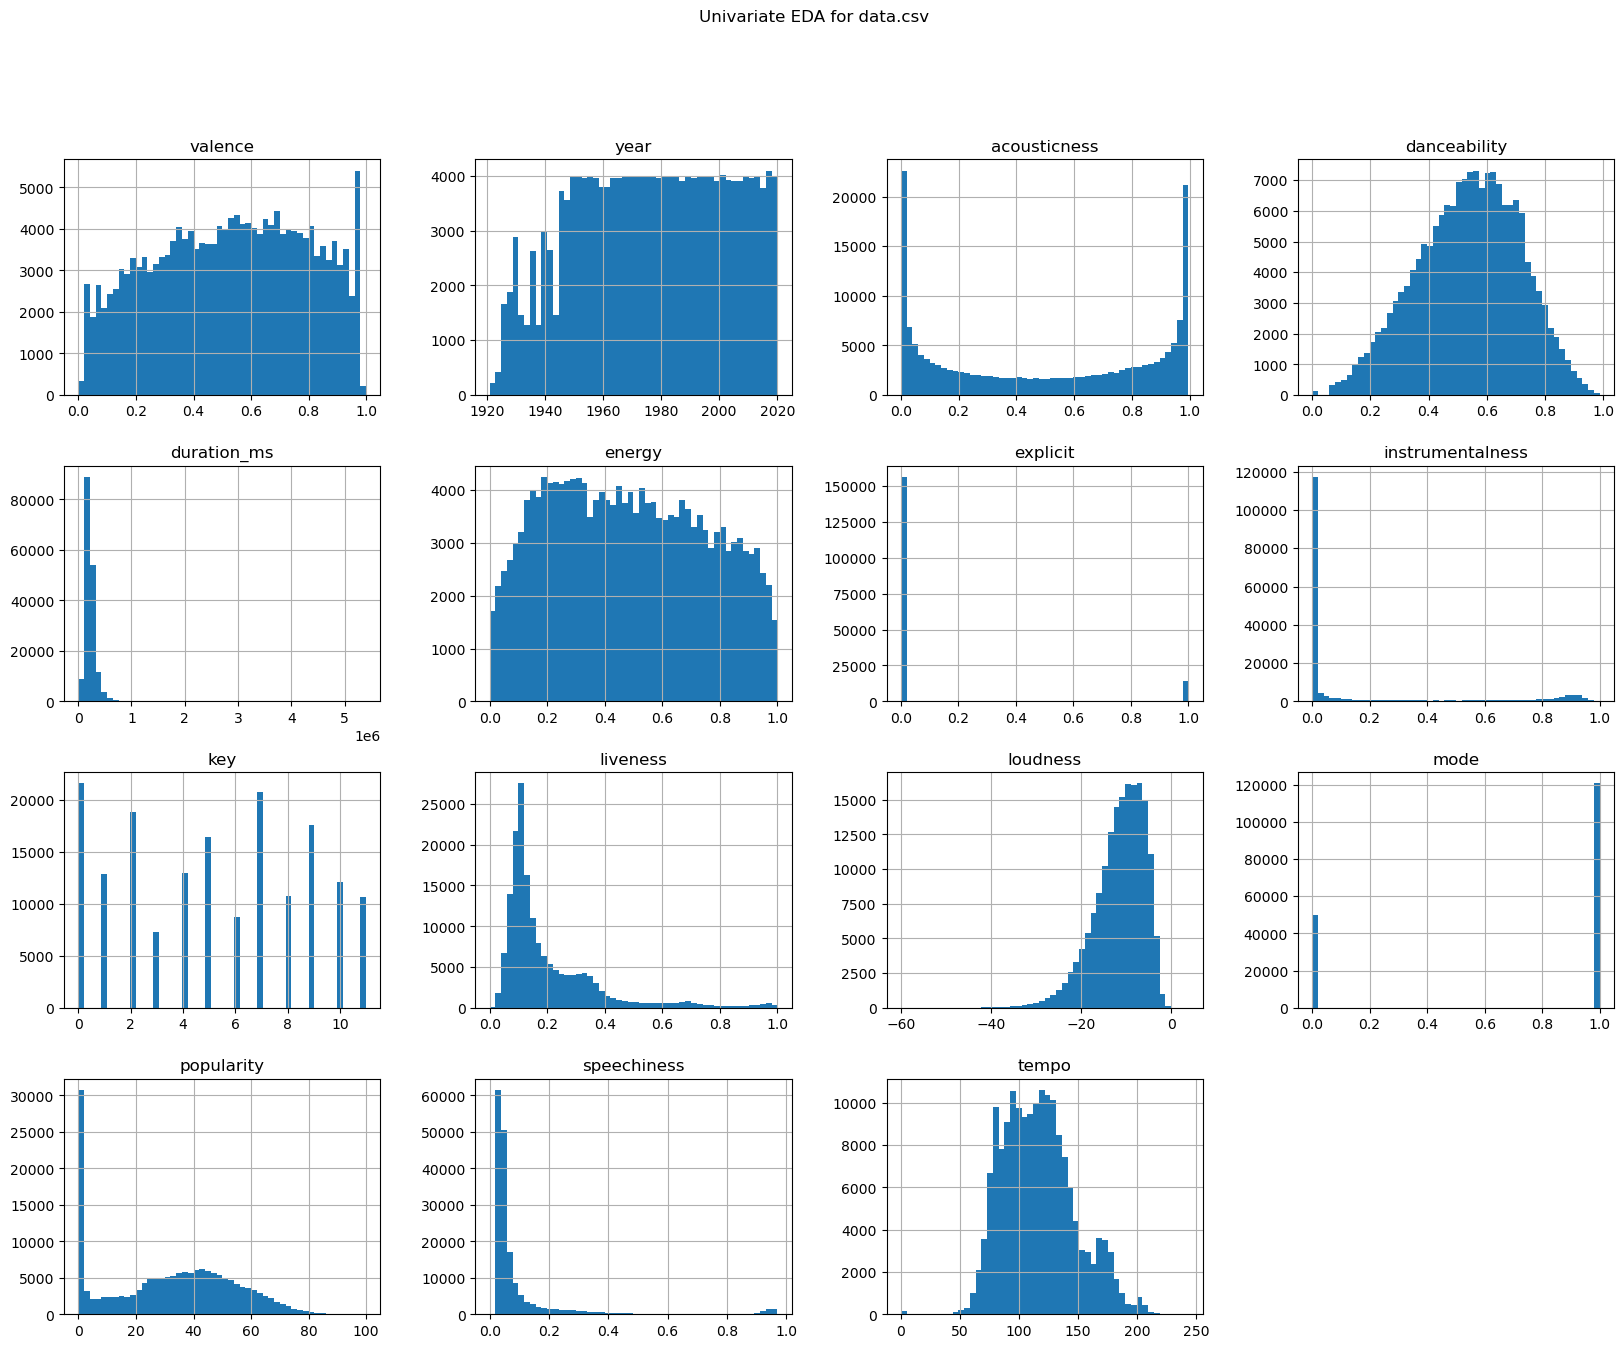

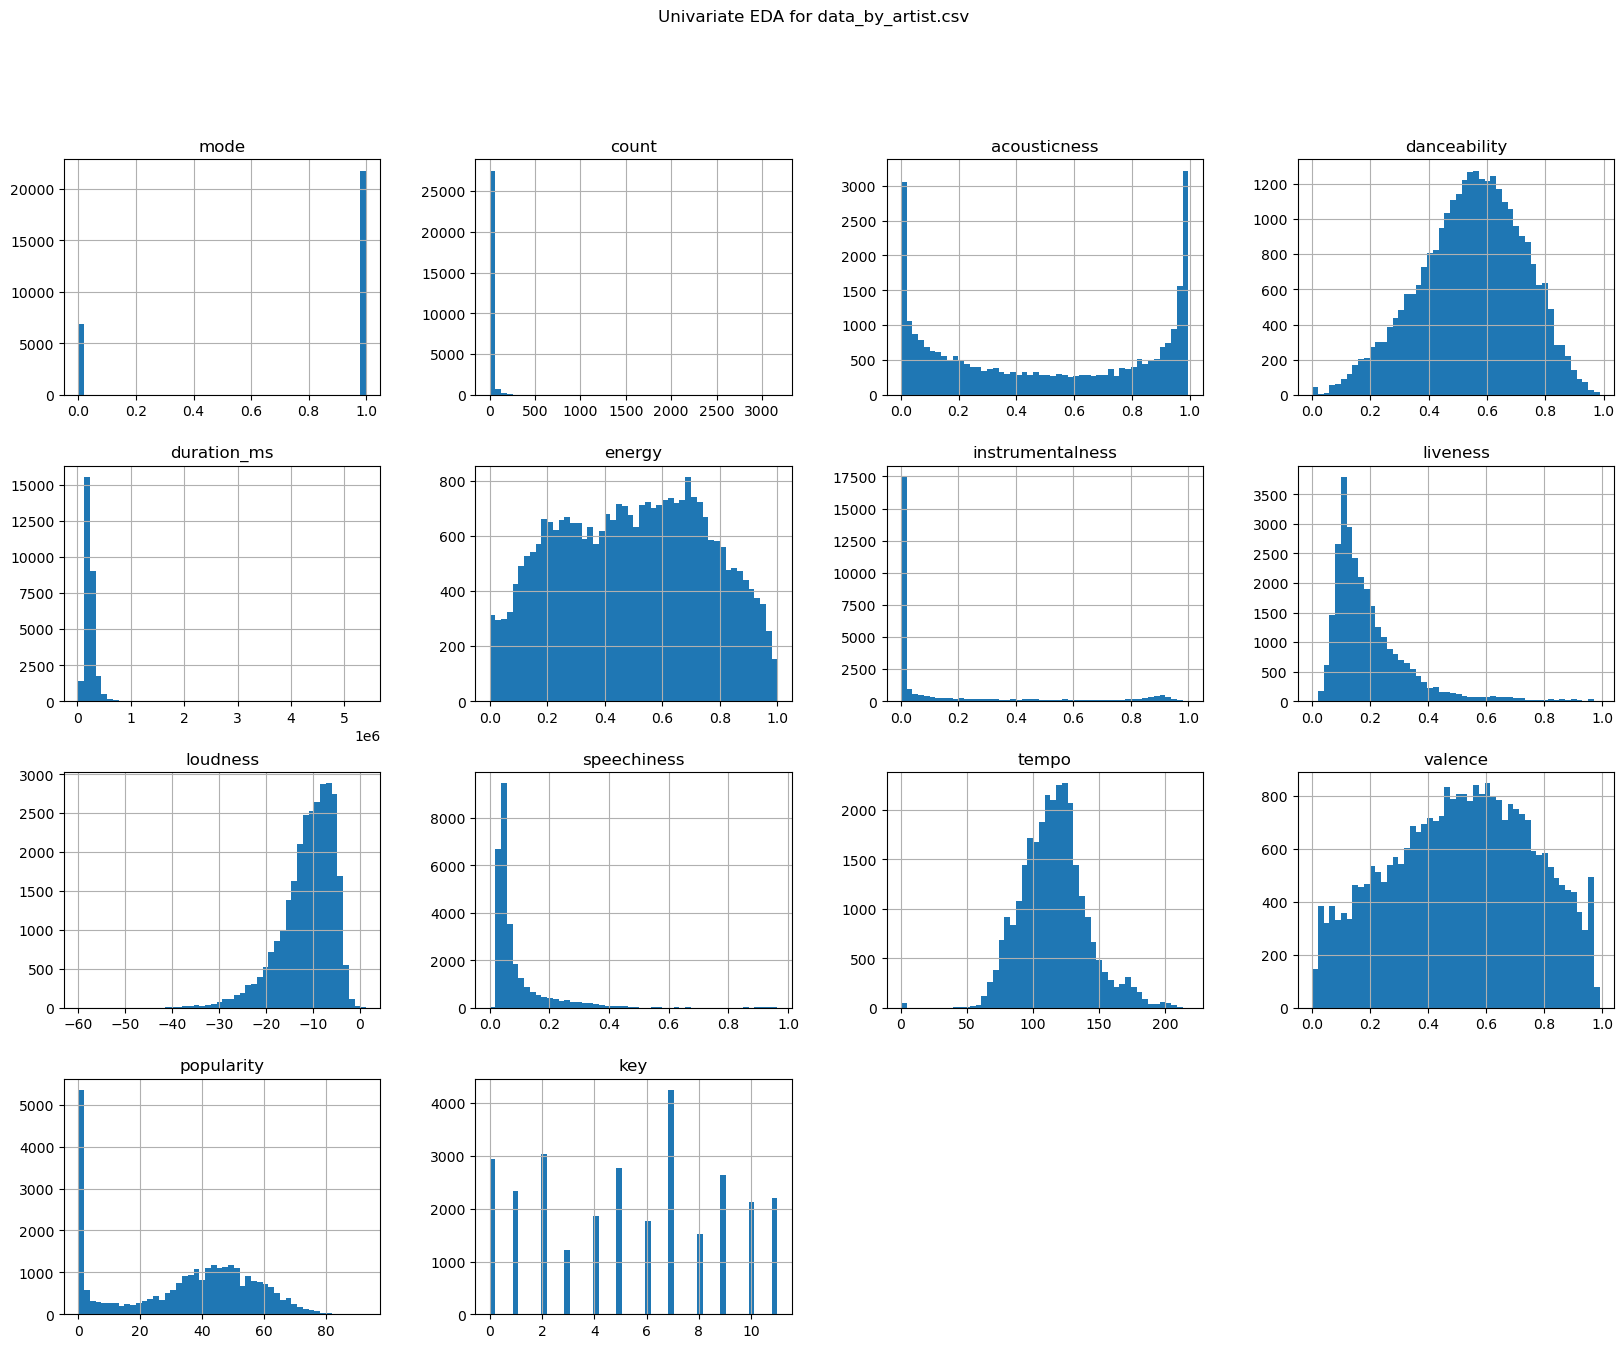

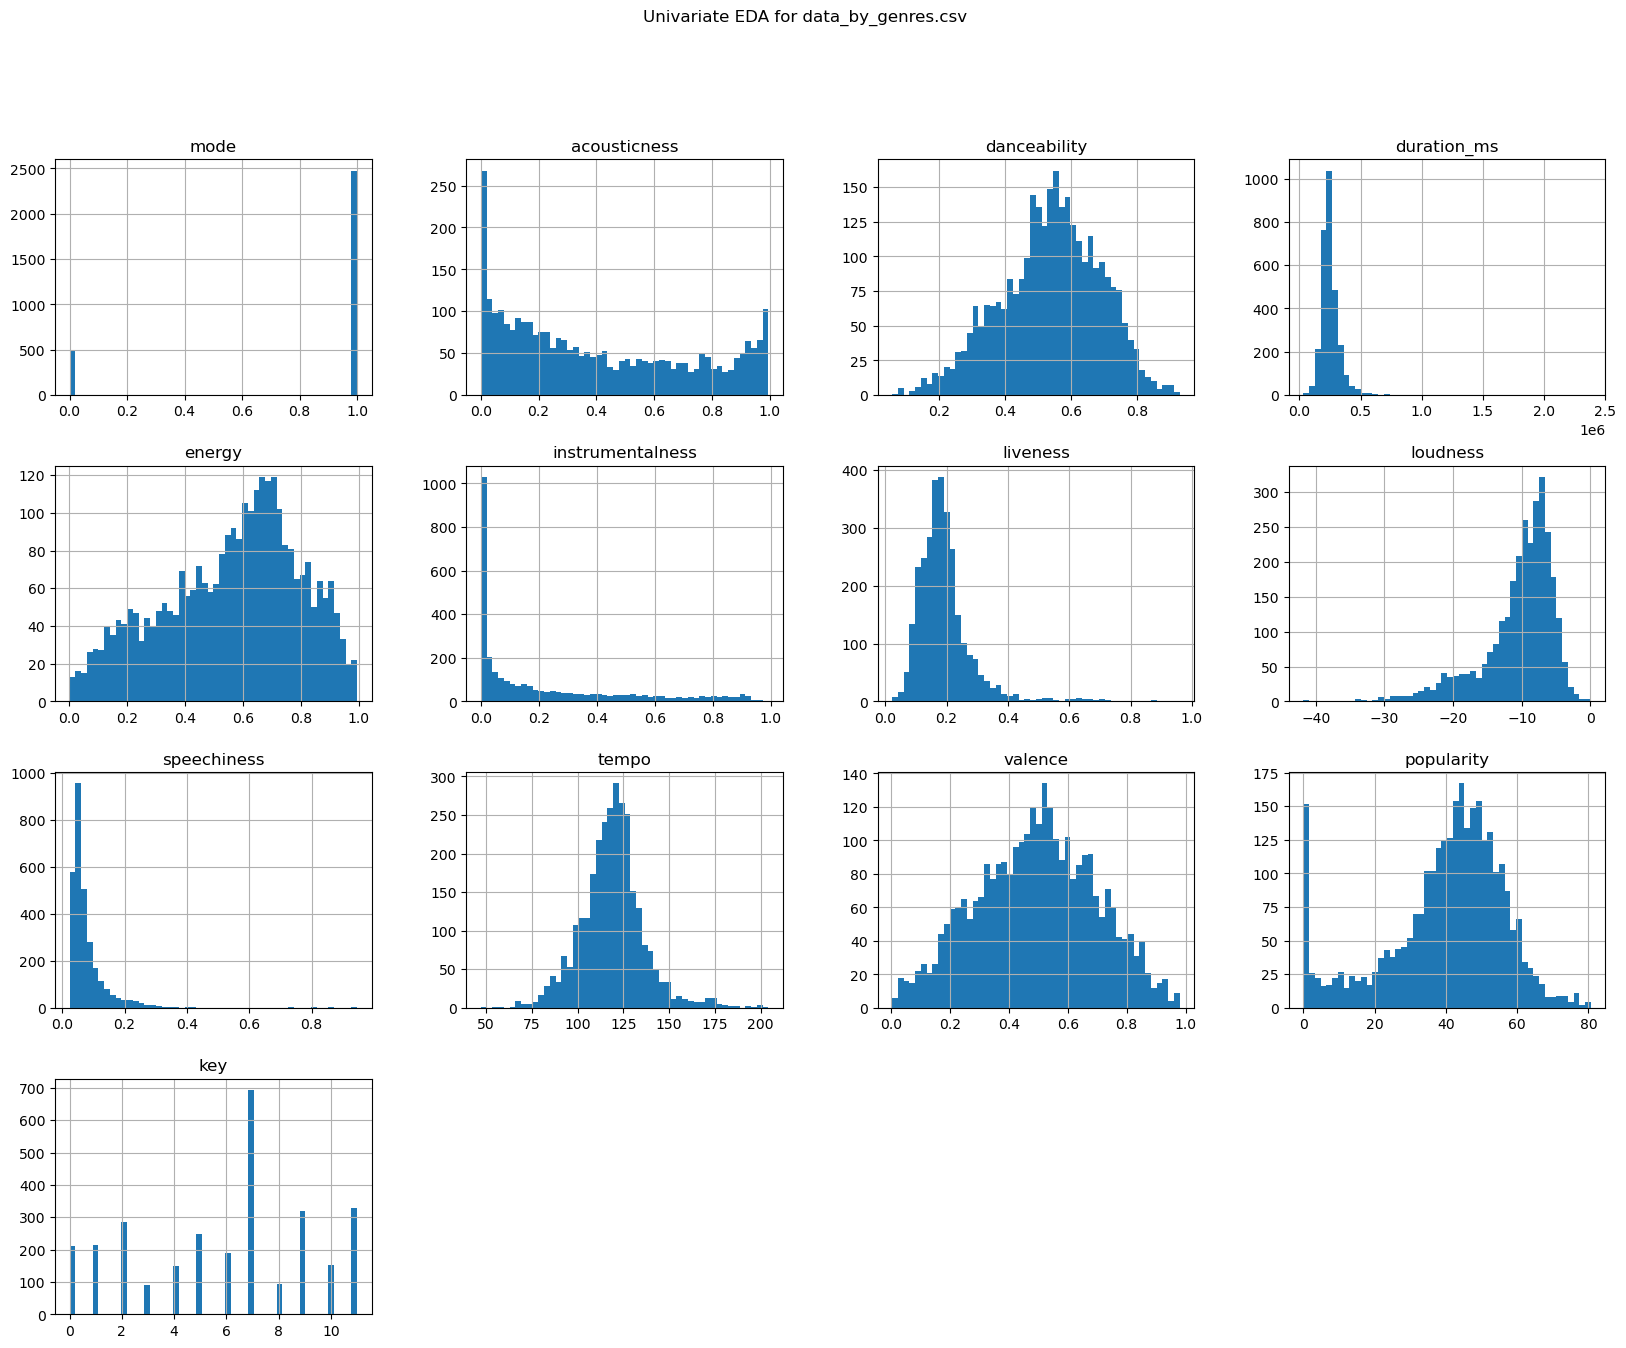

In [25]:
# Univariate EDA for `data.csv`
data.hist(bins=50, figsize=(20, 15))
plt.suptitle('Univariate EDA for data.csv')
plt.show()

# Univariate EDA for `data_by_artist.csv`
data_by_artist.hist(bins=50, figsize=(20, 15))
plt.suptitle('Univariate EDA for data_by_artist.csv')
plt.show()

# Univariate EDA for `data_by_genres.csv`
data_by_genres.hist(bins=50, figsize=(20, 15))
plt.suptitle('Univariate EDA for data_by_genres.csv')
plt.show()


# Data Preprocessing

In [26]:
# Normalize numerical features (Min-Max Scaling)

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.select_dtypes(include=['float64', 'int64'])))
data_scaled.columns = data.select_dtypes(include=['float64', 'int64']).columns

# Data Preparation

In [28]:
# Fitur relevan untuk content-based filtering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Menyiapkan fitur relevan dari data utama
data_features = data[features]

# Normalisasi fitur untuk dataset utama
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_features))
data_scaled.columns = data_features.columns

# Menyiapkan data berdasarkan artis dan genre untuk tambahan fitur
data_by_artist_features = data_by_artist[features]
data_by_genres_features = data_by_genres[features]

# Normalisasi fitur untuk data berdasarkan artis dan genre
data_by_artist_scaled = pd.DataFrame(scaler.fit_transform(data_by_artist_features))
data_by_artist_scaled.columns = data_by_artist_features.columns

data_by_genres_scaled = pd.DataFrame(scaler.fit_transform(data_by_genres_features))
data_by_genres_scaled.columns = data_by_genres_features.columns


# Model Development with Content-Based Filtering

In [30]:
# Menghitung cosine similarity untuk data utama, artis, dan genre (menggunakan 1000 sampel pertama)
cosine_sim = cosine_similarity(data_scaled[:1000], data_scaled[:1000])  # Cosine similarity untuk 1000 sampel dataset utama
cosine_sim_artist = cosine_similarity(data_by_artist_scaled[:1000], data_by_artist_scaled[:1000])  # Cosine similarity untuk 1000 sampel data berdasarkan artis
cosine_sim_genres = cosine_similarity(data_by_genres_scaled[:1000], data_by_genres_scaled[:1000])  # Cosine similarity untuk 1000 sampel data berdasarkan genre


In [31]:
# Fungsi untuk mencari lagu berdasarkan nama atau artis
def search_song(query, data):
    # Pencarian berdasarkan nama lagu dengan pengaturan case-insensitive
    songs_by_name = data[data['name'].str.contains(query, case=False, na=False)]
    # Pencarian berdasarkan artis
    songs_by_artist = data[data['artists'].str.contains(query, case=False, na=False)]
    
    # Gabungkan hasil pencarian berdasarkan nama dan artis
    search_results = pd.concat([songs_by_name, songs_by_artist]).drop_duplicates().reset_index(drop=True)
    return search_results

# Fungsi untuk mendapatkan rekomendasi berdasarkan indeks lagu
def get_recommendations(song_index, cosine_sim, data, num_recommendations=5):
    sim_scores = list(enumerate(cosine_sim[song_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Menyaring lagu-lagu dengan kemiripan yang terlalu tinggi (menghindari lagu yang sama persis)
    recommended_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]
    return data.iloc[recommended_indices]

# Menambahkan kemampuan pencarian dan rekomendasi berdasarkan artist atau genre
def recommend_based_on_search(query, data, cosine_sim, cosine_sim_artist, cosine_sim_genres, num_recommendations=5):
    # Cari lagu berdasarkan nama atau artis
    search_results = search_song(query, data)
    
    if search_results.empty:
        print(f"Tidak ada lagu yang ditemukan untuk '{query}'")
        return

    # Menampilkan hasil pencarian
    print(f"Hasil pencarian untuk '{query}':")
    print(search_results[['name', 'artists']])
    
    # Mengambil lagu pertama yang ditemukan untuk rekomendasi
    song_index = search_results.index[0]
    
    # Mendapatkan rekomendasi berdasarkan cosine similarity dari data utama
    print("\nRekomendasi lagu berdasarkan data utama:")
    recommended_songs_main = get_recommendations(song_index, cosine_sim, data)
    print(recommended_songs_main[['name', 'artists']])
    
    # Mendapatkan rekomendasi berdasarkan cosine similarity dari data berdasarkan artis
    print("\nRekomendasi lagu berdasarkan artis:")
    recommended_songs_artist = get_recommendations(song_index, cosine_sim_artist, data)
    print(recommended_songs_artist[['name', 'artists']])

    # Mendapatkan rekomendasi berdasarkan cosine similarity dari data berdasarkan genre
    print("\nRekomendasi lagu berdasarkan genre:")
    recommended_songs_genre = get_recommendations(song_index, cosine_sim_genres, data)
    print(recommended_songs_genre[['name', 'artists']])

In [35]:
# Contoh pencarian dan rekomendasi
query = "hope"
recommend_based_on_search(query, data, cosine_sim, cosine_sim_artist, cosine_sim_genres)

Hasil pencarian untuk 'hope':
                                                  name  \
0                               A Hopeless Love Affair   
1                             Who Do You Love, I Hope?   
2                                      Whopee Ti Yi Yo   
3            I Hope That I Don't Fall In Love With You   
4            Hopelessly Devoted To You - From “Grease”   
..                                                 ...   
120                                           Airplane   
121  Street Scene: Wrapped in a Ribbon and Tied in ...   
122                                            Suzanne   
123                                       Be Our Guest   
124                                         You and Me   

                                               artists  
0                                      ['Fats Waller']  
1                   ['Robert Lenn', 'Kathleen Carnes']  
2                         ['Roy Rogers', 'Dale Evans']  
3                                        ['To